# Import Libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
data = {
    "HT_temp": [0, 0, 0, 0, 0, 200, 400, 600, 0, 200, 400, 600, 0, 200, 400, 600, 0, 0, 200, 400, 0, 0, 0, 200, 200, 400, 400, 600, 0, 600, 600, 0],
    "I_corr": [4.16, 8.22, 8.9, 9.61, 10.39, 3.9, 1.5, 2.5, 3.3, 3.5, 1.7, 2.2, 1.17, 1.04, 0.2, 0.475, 4.5, 4.0, 3.8, 2.0, 9.0, 8.5, 8.0, 3.4, 3.2, 1.8, 1.6, 2.3, 1.0, 0.5, 0.6, 0.9],
    "Hardness": [608.3, 798.7, 932.3, 695.6, 421, 525, 876, 938, 770, 765, 950, 1053, 810, 913, 1270, 1317, 850, 700, 900, 800, 600, 950, 750, 820, 880, 920, 780, 860, 840, 1000, 1100, 830],
    "Rct": [13934, 10094, 8495, 6003, 2950, 14077, 50996, 28363, 14140, 21537, 69078, 52634, 24772, 29179, 188130, 123300, 13000, 15000, 12000, 20000, 8000, 9000, 11000, 18000, 17000, 25000, 30000, 40000, 30000, 150000, 140000, 35000],
    "additive_type": [0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
    "additive_conc": [0, 1000, 4000, 8000, 10000, 0, 0, 0, 1000, 1000, 1000, 1000, 5, 5, 5, 5, 0, 0, 0, 0, 2000, 3000, 5000, 1000, 1000, 1000, 1000, 1000, 5, 5, 5, 5]
}

# Create the DataFrame
df = pd.DataFrame(data)

In [3]:
df.to_excel('Data.xlsx', index=False)

## Inspect the Data

In [4]:
# Display basic info
print("Data Overview:")
print(df.head())
print("\nData Types and Missing Values:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Data Overview:
   HT_temp  I_corr  Hardness    Rct  additive_type  additive_conc
0        0    4.16     608.3  13934              0              0
1        0    8.22     798.7  10094              1           1000
2        0    8.90     932.3   8495              1           4000
3        0    9.61     695.6   6003              1           8000
4        0   10.39     421.0   2950              1          10000

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HT_temp        32 non-null     int64  
 1   I_corr         32 non-null     float64
 2   Hardness       32 non-null     float64
 3   Rct            32 non-null     int64  
 4   additive_type  32 non-null     int64  
 5   additive_conc  32 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.6 KB
None

Descriptive Statistics:
          HT_temp     I

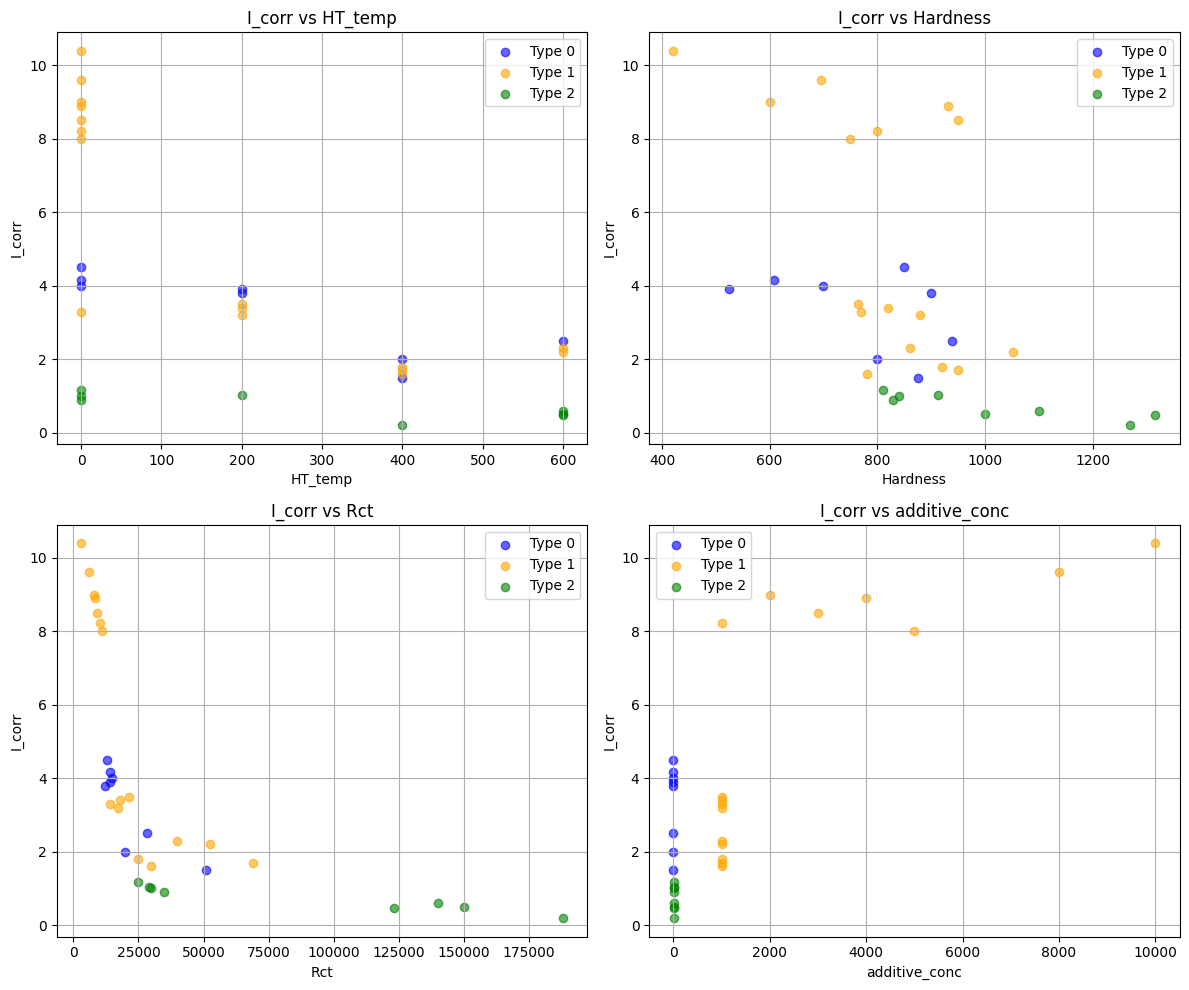

In [5]:
# Inspect the Data ==> Plots


# Define colors for each additive_type
colors = {0: 'blue', 1: 'orange', 2: 'green'}

# Set up the subplot grid (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=4.0)

# Plot 1: I_corr vs HT_temp
for additive_type in df['additive_type'].unique():
    mask = df['additive_type'] == additive_type
    axes[0, 0].scatter(df[mask]['HT_temp'], df[mask]['I_corr'], color=colors[additive_type], label=f'Type {additive_type}', alpha=0.6)
axes[0, 0].set_xlabel('HT_temp')
axes[0, 0].set_ylabel('I_corr')
axes[0, 0].set_title('I_corr vs HT_temp')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: I_corr vs Hardness
for additive_type in df['additive_type'].unique():
    mask = df['additive_type'] == additive_type
    axes[0, 1].scatter(df[mask]['Hardness'], df[mask]['I_corr'], color=colors[additive_type], label=f'Type {additive_type}', alpha=0.6)
axes[0, 1].set_xlabel('Hardness')
axes[0, 1].set_ylabel('I_corr')
axes[0, 1].set_title('I_corr vs Hardness')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: I_corr vs Rct
for additive_type in df['additive_type'].unique():
    mask = df['additive_type'] == additive_type
    axes[1, 0].scatter(df[mask]['Rct'], df[mask]['I_corr'], color=colors[additive_type], label=f'Type {additive_type}', alpha=0.6)
axes[1, 0].set_xlabel('Rct')
axes[1, 0].set_ylabel('I_corr')
axes[1, 0].set_title('I_corr vs Rct')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: I_corr vs additive_conc
for additive_type in df['additive_type'].unique():
    mask = df['additive_type'] == additive_type
    axes[1, 1].scatter(df[mask]['additive_conc'], df[mask]['I_corr'], color=colors[additive_type], label=f'Type {additive_type}', alpha=0.6)
axes[1, 1].set_xlabel('additive_conc')
axes[1, 1].set_ylabel('I_corr')
axes[1, 1].set_title('I_corr vs additive_conc')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Train Test split - Stratification

In [6]:
# Separate features and target
X = df.drop('I_corr', axis=1)
y = df['I_corr']

# Split into train/test with stratification on additive_type
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=X['additive_type'], random_state=42
)

# Verify shapes
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (25, 5)
Testing set shape: (7, 5)


# Modeles, Transformations and Cross Validation setup

In [7]:
# Define numerical and categorical features
numerical_features = ['HT_temp', 'Hardness', 'Rct', 'additive_conc']
categorical_features = ['additive_type']

# Scaling methods
scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'log': FunctionTransformer(np.log1p)  # log(x + 1) to handle zeros
}


In [8]:
# Models to test
models = {
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'RF': RandomForestRegressor(random_state=42),
    'GB': GradientBoostingRegressor(random_state=42),
    'MLP': MLPRegressor(max_iter=1000, early_stopping=True, random_state=42)
}

In [9]:
# k-fold Cross Validation

# Extract additive_type for stratification
additive_type_train = X_train['additive_type']

# Stratified K-Fold (for CV)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Store results
results = []

# Train & Evaluate Modeles

In [10]:
# Iterate through all model-scaler combinations
for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        # Preprocessor: Scale numerical + OneHotEncode categorical
        preprocessor = ColumnTransformer(transformers=[
            ('num', scaler, numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

        # Pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        # Cross-validation scores and test evaluation
        try:
            # Cross-validation metrics
            mse_scores = cross_val_score(
                pipeline, X_train, y_train,
                cv=cv.split(X_train, additive_type_train),
                scoring='neg_mean_squared_error',
                n_jobs=-1
            )
            r2_scores = cross_val_score(
                pipeline, X_train, y_train,
                cv=cv.split(X_train, additive_type_train),
                scoring='r2',
                n_jobs=-1
            )

            avg_rmse = np.sqrt(-mse_scores.mean())
            avg_r2 = r2_scores.mean()

            # Full training and test evaluation
            pipeline.fit(X_train, y_train)

            # Test metrics
            y_pred_test = pipeline.predict(X_test)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
            test_r2 = r2_score(y_test, y_pred_test)

            results.append({
                'Model': model_name,
                'Scaler': scaler_name,
                'CV RMSE': avg_rmse,
                'CV R²': avg_r2,
                'Test RMSE': test_rmse,
                'Test R²': test_r2
            })

        except Exception as e:
            print(f"Error with {model_name} + {scaler_name}: {str(e)}")

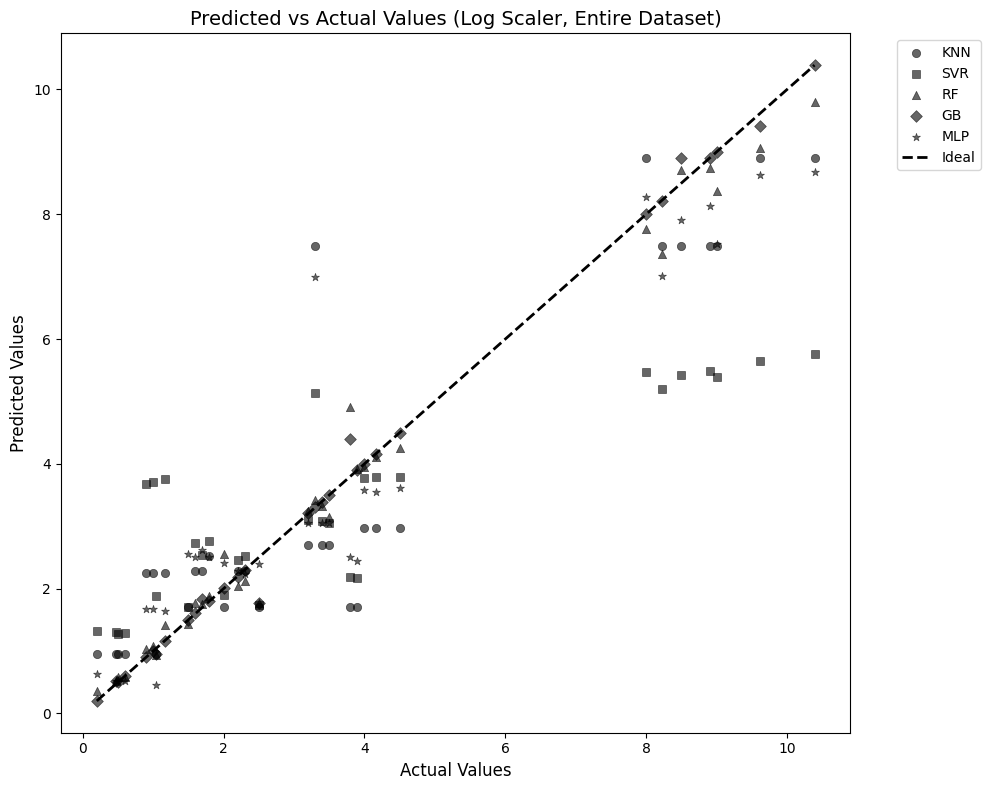

In [11]:
import matplotlib.pyplot as plt

# Create a figure for the plot
plt.figure(figsize=(10, 8))

# Define different marker styles for each model
markers = ['o', 's', '^', 'D', '*', 'P', 'X']  # Circle, Square, Triangle, Diamond, Star, Plus, X

# Iterate through the models to plot predicted vs actual for each model
for i, (model_name, model) in enumerate(models.items()):
    # Preprocessor: Scale numerical + OneHotEncode categorical (using only log scaler)
    preprocessor = ColumnTransformer(transformers=[
        ('num', scalers['log'], numerical_features),  # Only log scaler
        ('cat', OneHotEncoder(), categorical_features)
    ])

    # Pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Fit the pipeline on the entire dataset
    pipeline.fit(X_train, y_train)

    # Predict on the entire dataset
    X_combined = pd.concat([X_train, X_test])  # Combine train and test data
    y_combined = pd.concat([y_train, y_test])  # Combine train and test labels
    y_pred_combined = pipeline.predict(X_combined)

    # Plot predicted vs actual with black color and unique marker style
    plt.scatter(y_combined, y_pred_combined, label=model_name, color='black', marker=markers[i], alpha=0.6, edgecolor='black', linewidth=0.5)

# Add a diagonal line for reference
plt.plot([y_combined.min(), y_combined.max()], [y_combined.min(), y_combined.max()], 'k--', lw=2, label='Ideal')

# Add labels and title
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Predicted vs Actual Values (Log Scaler, Entire Dataset)', fontsize=14)

# Add legend
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

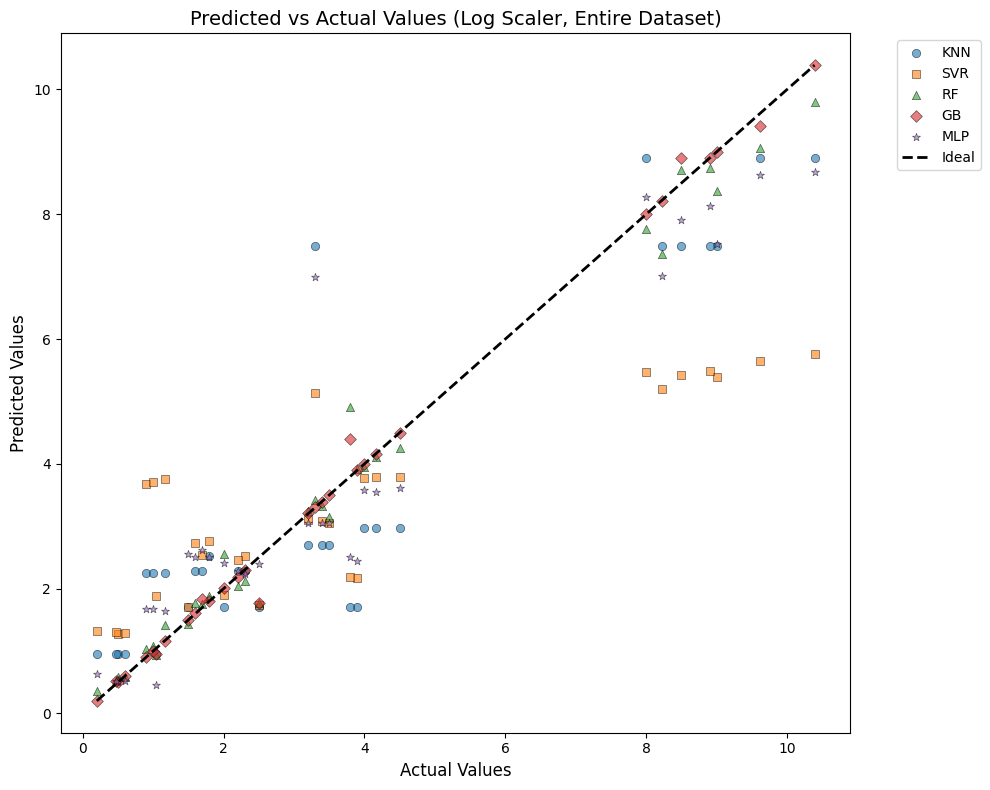

In [12]:
# Colorful version

# Create a figure for the plot
plt.figure(figsize=(10, 8))

# Define different colors and markers for each model
colors = plt.cm.tab10.colors[:len(models)]  # First N colors from tab10 colormap
markers = ['o', 's', '^', 'D', '*', 'P', 'X']  # Circle, Square, Triangle, Diamond, Star, Plus, X

# Iterate through the models to plot predicted vs actual for each model
for i, (model_name, model) in enumerate(models.items()):
    # Preprocessor: Scale numerical + OneHotEncode categorical (using only log scaler)
    preprocessor = ColumnTransformer(transformers=[
        ('num', scalers['log'], numerical_features),  # Only log scaler
        ('cat', OneHotEncoder(), categorical_features)
    ])

    # Pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Fit the pipeline on the entire dataset
    pipeline.fit(X_train, y_train)

    # Predict on the entire dataset
    X_combined = pd.concat([X_train, X_test])  # Combine train and test data
    y_combined = pd.concat([y_train, y_test])  # Combine train and test labels
    y_pred_combined = pipeline.predict(X_combined)

    # Plot predicted vs actual with unique color and marker
    plt.scatter(
        y_combined, y_pred_combined,
        label=model_name,
        color=colors[i],                # Different color for each model
        marker=markers[i],              # Unique marker style
        alpha=0.6,
        edgecolor='black',              # Keep marker borders for clarity
        linewidth=0.5
    )

# Add a diagonal line for reference
plt.plot([y_combined.min(), y_combined.max()], [y_combined.min(), y_combined.max()], 'k--', lw=2, label='Ideal')

# Add labels and title
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Predicted vs Actual Values (Log Scaler, Entire Dataset)', fontsize=14)

# Add legend
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.to_excel('model_performance_results2.xlsx', index=False)

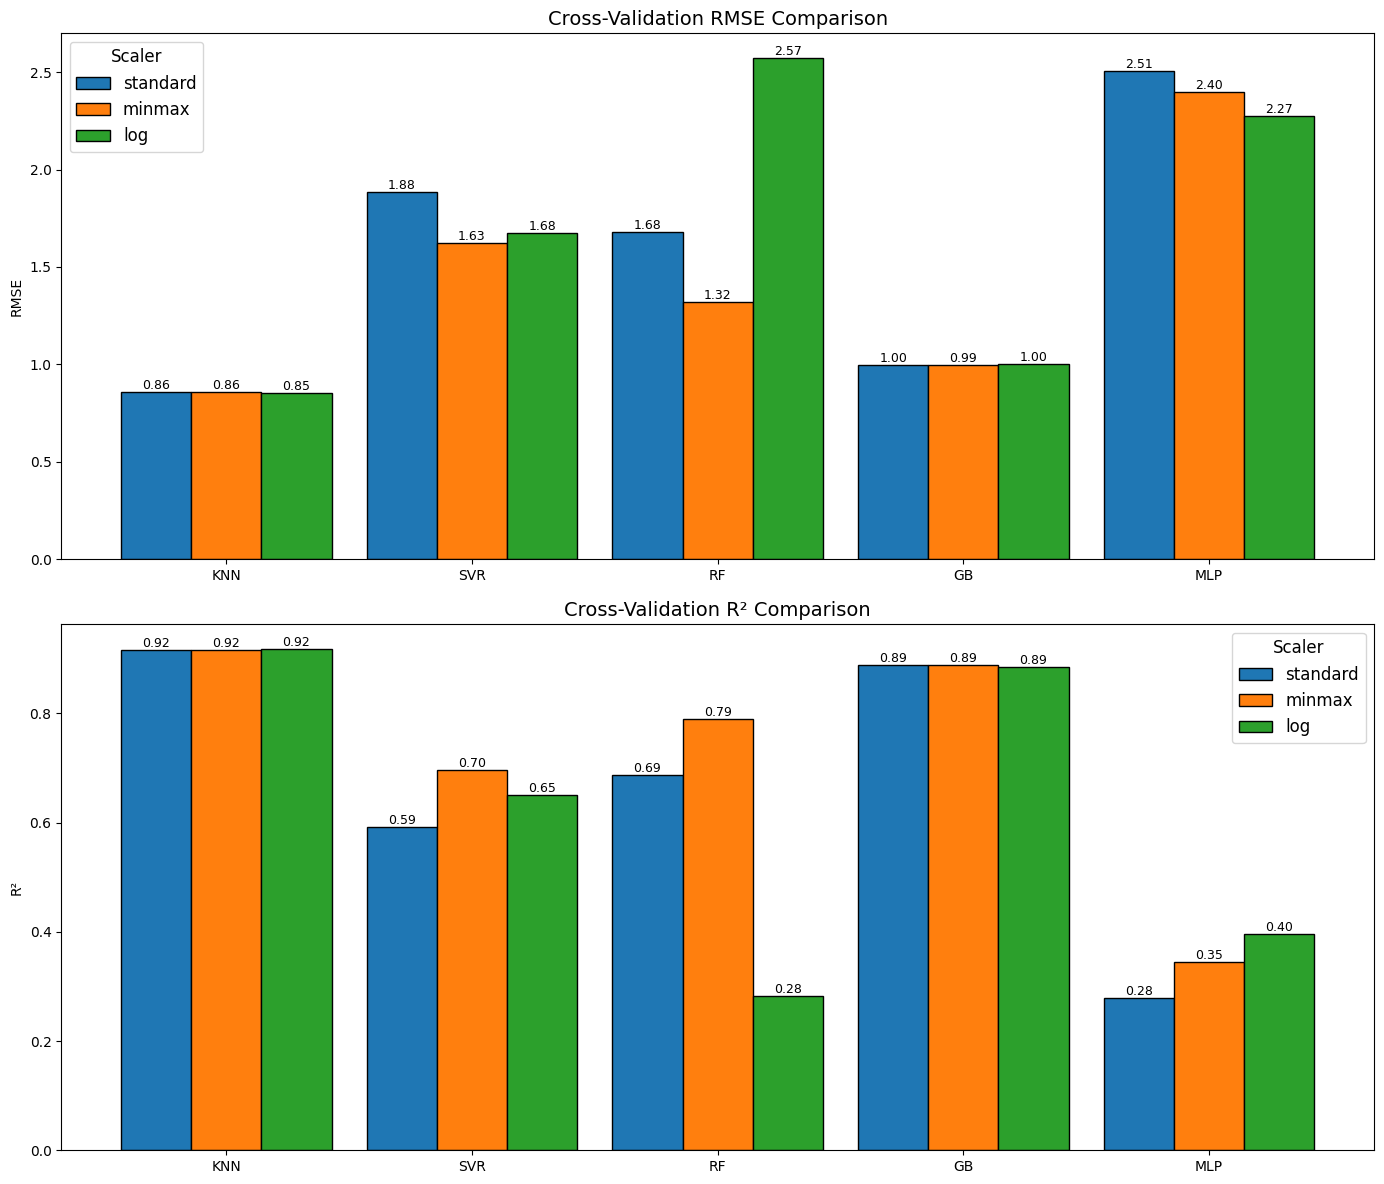

In [14]:
# Plot

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Adjusted parameters for closer spacing and wider bars
BAR_WIDTH = 0.4  # Increased from 0.25
MODEL_SPACING = 0.2  # Reduced from 0.5 (now ~1/3 of original spacing)
SCALERS = ['standard', 'minmax', 'log']
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c']
models = results_df['Model'].unique()

# New x_base calculation accounting for bar widths and spacing
x_base = np.arange(len(models)) * (len(SCALERS) * BAR_WIDTH + MODEL_SPACING)

# Custom styling
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.major.pad': 10
})

# Plot RMSE
for i, scaler in enumerate(SCALERS):
    values = results_df[results_df['Scaler'] == scaler].sort_values('Model')['CV RMSE']
    x = x_base + i * BAR_WIDTH
    bars = ax1.bar(x, values, BAR_WIDTH, color=COLORS[i], label=scaler, edgecolor='black')
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=9)

ax1.set_title('Cross-Validation RMSE Comparison')
ax1.set_ylabel('RMSE')
ax1.set_xticks(x_base + BAR_WIDTH)
ax1.set_xticklabels(models)
ax1.legend(title='Scaler')

# Plot R²
for i, scaler in enumerate(SCALERS):
    values = results_df[results_df['Scaler'] == scaler].sort_values('Model')['CV R²']
    x = x_base + i * BAR_WIDTH
    bars = ax2.bar(x, values, BAR_WIDTH, color=COLORS[i], label=scaler, edgecolor='black')
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=9)

ax2.set_title('Cross-Validation R² Comparison')
ax2.set_ylabel('R²')
ax2.set_xticks(x_base + BAR_WIDTH)
ax2.set_xticklabels(models)
ax2.legend(title='Scaler')

plt.tight_layout()
plt.show()

# Grid search

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
import pandas as pd

# Define hyperparameter grids
param_grids = {
    'GB': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 4, 5]
    },
    'RF': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    }
}

# Configure log-scaler pipeline
log_preprocessor = ColumnTransformer(transformers=[
    ('num', FunctionTransformer(np.log1p), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

tuning_results = []

for model_name in ['GB', 'RF']:
    # Create base pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', log_preprocessor),
        ('regressor', GradientBoostingRegressor() if model_name == 'GB'
                      else RandomForestRegressor())
    ])

    # GridSearch with cross-validation
    grid_search = GridSearchCV(
        pipeline,
        param_grids[model_name],
        cv=cv.split(X_train, additive_type_train),
        scoring={'rmse': 'neg_mean_squared_error', 'r2': 'r2'},
        refit='rmse',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Process results
    for idx in range(len(grid_search.cv_results_['params'])):
        try:
            # Get parameter combination
            params = grid_search.cv_results_['params'][idx]

            # Get CV scores
            cv_rmse = np.sqrt(-grid_search.cv_results_['mean_test_rmse'][idx])
            cv_r2 = grid_search.cv_results_['mean_test_r2'][idx]

            # Retrain on full train set
            model = clone(pipeline).set_params(**params)
            model.fit(X_train, y_train)

            # Test scores
            y_pred = model.predict(X_test)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            test_r2 = r2_score(y_test, y_pred)

            # Store results
            tuning_results.append({
                'Model': model_name,
                **params,
                'CV RMSE': cv_rmse,
                'CV R²': cv_r2,
                'Test RMSE': test_rmse,
                'Test R²': test_r2
            })
        except Exception as e:
            print(f"Error with {model_name} combination {idx}: {str(e)}")

# Clean parameter names and save
results_df = pd.DataFrame(tuning_results)
results_df.columns = [col.replace('regressor__', '') for col in results_df.columns]
results_df.to_excel('gb_rf_tuning_results2.xlsx', index=False)